# Lab 0 - Python and Jupyter notebook introduction

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Warm-up Exercises   
  
  Collaborators : None

Try the following commands on your jupyter notebook or python editor and see what output they produce.  

In [2]:
a = 1 + 5
b = 2
c = a + b
print(a/b)
print(a//b)
print(a-b)
print(a*b)
print(a**b)

3.0
3
4
12
36


In [3]:
a = np.array([[3, 1],
              [1, 3]])
b = np.array([[3],
              [5]])
print(a * b)
print(np.dot(a, b))
print(np.dot(b.T, a))
c = a**(-1.0)
print(c * a)

[[ 9  3]
 [ 5 15]]
[[14]
 [18]]
[[14 18]]
[[1. 1.]
 [1. 1.]]


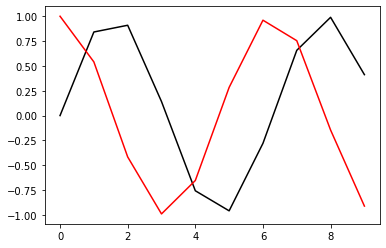

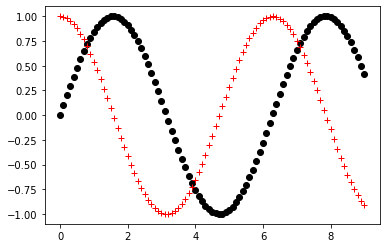

In [4]:
t = np.arange(10)
g = np.sin(t)
h = np.cos(t)
plt.figure()
plt.plot(t, g, 'k', t, h, 'r');

t = np.arange(0, 9.1, 0.1)
g = np.sin(t)
h = np.cos(t)
plt.figure()
plt.plot(t, g, 'ok', t, h, '+r');

[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]
[1.00230524e+00 1.78186583e+01 3.16774344e+02 5.63151182e+03
 1.00115196e+05 1.77981556e+06 3.16409854e+07 5.62503203e+08
 1.00000000e+10]
[1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01]


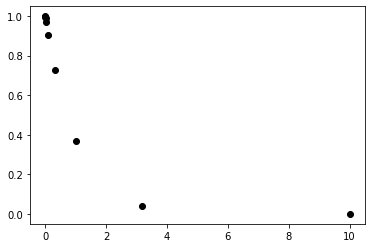

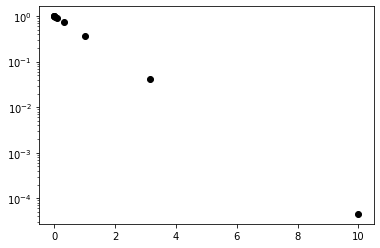

In [5]:
t = np.linspace(0, 10, 20)
print(t)
t = np.logspace(0.001, 10, 9)
print(t)
t = np.logspace(-3, 1, 9)
print(t)
y = np.exp(-t)

plt.figure()
plt.plot(t, y, 'ok')
plt.figure()
plt.semilogy(t, y, 'ok')

# Integration Function  
 

Here is a more complicated function that computes the integral $y(x)$ with interval $dx$:

$$c = \int y(x) dx \sim \sum_{i=1}^N y_i dx_i .$$

It can deal with both cases of even and uneven sampling.

In [6]:
def integral(y, dx):
    # function c = integral(y, dx)
    # To numerically calculate integral of vector y with interval dx:
    # c = integral[ y(x) dx]
    # ------ This is a demonstration program ------
    n = len(y) # Get the length of vector y
    nx = len(dx) if np.iterable(dx) else 1
    c = 0 # initialize c because we are going to use it
    # dx is a scalar <=> x is equally spaced
    if nx == 1: # ’==’, equal to, as a condition
        for k in range(1, n):
            c = c + (y[k] + y[k-1]) * dx / 2
    # x is not equally spaced, then length of dx has to be n-1
    elif nx == n-1:
        for k in range(1, n):
            c = c + (y[k] + y[k-1]) * dx[k-1] / 2
    # If nx is not 1 or n-1, display an error messege and terminate program
    else:
        print('Lengths of y and dx do not match!')
    return c


Save this program as `integral.py`. Now we can call it to compute $\int_0^\pi \sin(t) dt$
with an evenly sampled time series (`even.py`).

1.9954413183201944


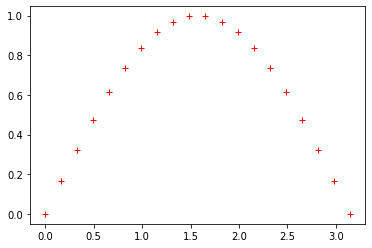

In [7]:
# number of samples
nt = 20
# generate time vector
t = np.linspace(0, np.pi, nt)
# compute sample interval (evenly sampled, only one number)
dt = t[1] - t[0]
y = np.sin(t)
plt.plot(t, y, 'r+')
c = integral(y, dt)
print(c)

## Part 1  
  
  Collaborators : None

First plot $y(t)$. Is the output $c$ value what you are expecting for
$\int_0^\pi \sin(t) dt$? How can you improve the accuracy of your computation?

1.9954413183201944


Text(0, 0.5, 'y(t)')

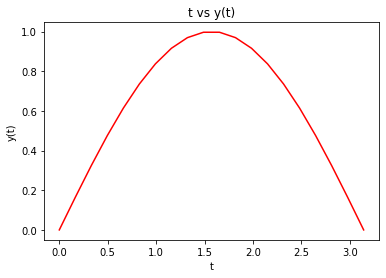

In [8]:
plt.plot(t,y,'r')
print(c)
plt.title("t vs y(t)")
plt.xlabel("t")
plt.ylabel("y(t)")



The output $c$ = 1.9954413183201944 is not the expected value for $\int_0^\pi \sin(t) dt$. The $\int_0^\pi \sin(t) dt$ value is supposed to be 2.  
We can improve the accuracy of the computation by increasing the number of samples ($nt$). By increasing the number of samples, the $dt$ value would be smaller, therefore, the computational value of $\int_0^\pi \sin(t) dt$ would get closer to the real value 2.


In [9]:
# increasing number of samples to 1000
nt = 1000
# generate time vector
t = np.linspace(0, np.pi, nt)
# compute sample interval (evenly sampled, only one number)
dt = t[1] - t[0]
y = np.sin(t)
c = integral(y, dt)
print(c)
# the c value with sample size 1000 is more accurate than the the c value with sample size 20.

1.9999983517708535


## Part 2  
  
  Collaborators : None

For an unevenly spaced time series that depicts $\sin(4 \pi t^2)$ (so-called chirp function),
compute $\int_0^1 \sin(4 \pi t^2) dt$ (saved as `uneven.py`).

0.13609684944836983


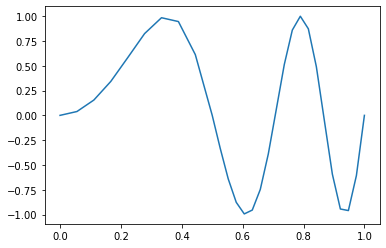

In [10]:
nt = 10
# sampling between [0,0.5]
t1 = np.linspace(0, 0.5, nt)
# double sampling between [0.5,1]
t2 = np.linspace(0.5, 1, 2*nt)
# concatenate time vector
t = np.concatenate((t1[:-1], t2))
# compute y values (f=2t)
y = np.sin(2 * np.pi * 2 * t**2)
plt.plot(t, y)
# compute sampling interval vector
dt = t[1:] - t[:-1]
c = integral(y, dt)
print(c)

Show your plot of $y(t)$ for $nt = 100$. Try different $nt$ values and see
how the integral results change. Write a `for` loop around the statements above to try
a series of `nt` values (e.g, 10, 50, 100, 500, 1000) and generate a plot of $c(nt)$.
What value does $c$ converge to after using larger and larger $nt$? (Please include your
modified Python code.)

0.13716087327575752


Text(0, 0.5, 'sin(4$\\pi t^2$)')

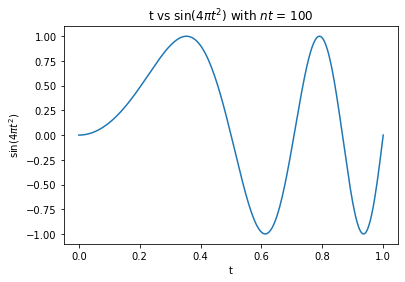

In [11]:
# increasing number of samples to 100
nt = 100
t1 = np.linspace(0, 0.5, nt)
t2 = np.linspace(0.5, 1, 2*nt)
t = np.concatenate((t1[:-1], t2))
y = np.sin(2 * np.pi * 2 * t**2)
plt.plot(t, y)
dt = t[1:] - t[:-1]
c = integral(y, dt)
print(c)
plt.title("t vs sin(4$\pi t^2$) with $nt$ = 100")
plt.xlabel("t")
plt.ylabel("sin(4$\pi t^2$)")


0.13005592488057965


Text(0, 0.5, 'sin(4$\\pi t^2$)')

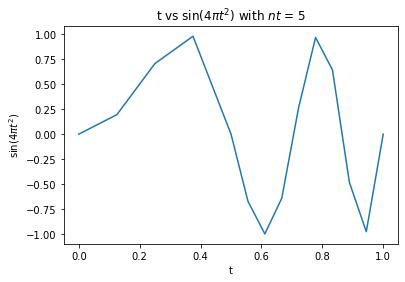

In [12]:
# changing number of samples to 5
nt = 5
t1 = np.linspace(0, 0.5, nt)
t2 = np.linspace(0.5, 1, 2*nt)
t = np.concatenate((t1[:-1], t2))
y = np.sin(2 * np.pi * 2 * t**2)
plt.plot(t, y)
dt = t[1:] - t[:-1]
c = integral(y, dt)
print(c)
plt.title("t vs sin(4$\pi t^2$) with $nt$ = 5")
plt.xlabel("t")
plt.ylabel("sin(4$\pi t^2$)")


By increasing the number of samples (nt), the integral results get closer to the real value of  $\int_0^1 \sin(4 \pi t^2) dt$.  
By decreasing the number of samples, the integral results get farther away from the real value of  $\int_0^1 \sin(4 \pi t^2) dt$.

nt = 10 , 0.13609684944836983
nt = 50 , 0.13713883589522521
nt = 100 , 0.13716087327575752
nt = 500 , 0.13716748836305367
nt = 1000 , 0.13716768701408735


Text(0, 0.5, 'c(nt)')

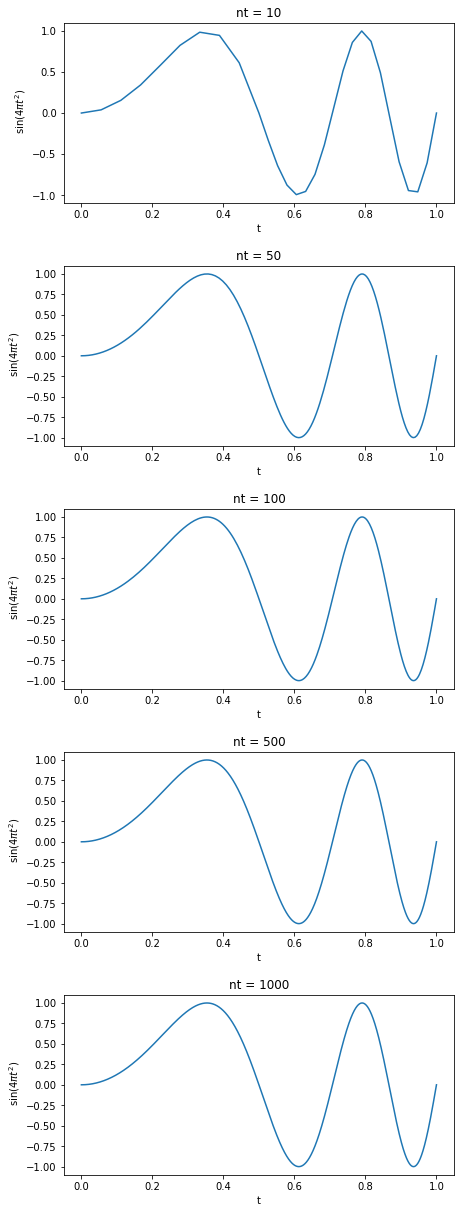

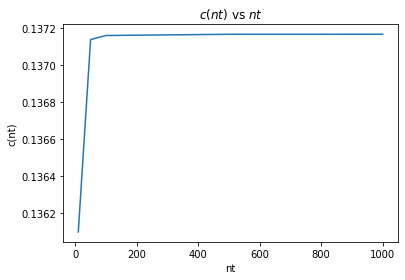

In [13]:
nts = [10,50,100,500,1000]
c_nt = []
plt.figure(figsize = (7,20))
i = 1
for nt in nts:

    # sampling between [0,0.5]
    t1 = np.linspace(0, 0.5, nt)
    # double sampling between [0.5,1]
    t2 = np.linspace(0.5, 1, 2*nt)
    # concatenate time vector
    t = np.concatenate((t1[:-1], t2))
    # compute y values (f=2t)
    y = np.sin(2 * np.pi * 2 * t**2)
    plt.subplot(5,1,i)
    plt.plot(t, y)
    # compute sampling interval vector
    dt = t[1:] - t[:-1]
    c = integral(y, dt)
    c_nt.append(c)
    print('nt = '+str(nt) + " , " + str(c))
    i += 1
    plt.title("nt = "+str(nt))
    plt.xlabel("t")
    plt.ylabel(" $\sin(4 \pi t^2)$")

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
    
plt.figure()
plt.plot(nts, c_nt)
plt.title("$c(nt)$ vs $nt$")
plt.xlabel("nt")
plt.ylabel("c(nt)")

$c$ converges to 0.13716768701408735 after using larger and larger nt.

# Accuracy of Sampling  
  
  Collaborators : None

Let us sample the function $g(t) = \cos(2 \pi f t)$ at sampling interval $dt = 1$, for frequency values of
$f = 0, 0.25, 0.5, 0.75, 1.0$ hertz.

In each case, plot on the screen the points of the resulting time series (as isolated red crosses) to
see how well it approximates $g(t)$ (plotted as a blue-dotted line, try a very small $dt$ fine
sampling). Submit only plots for frequencies of $0.25$ and $0.75$
Hertz, use xlabel, ylabel, title commands to annotate each plot.
For each frequency that you investigated, do you think the sampling time series is a fair representation of
the original time series $g(t)$? What is the apparent frequency for the sampling time series? (Figure out
after how many points (N) the series repeats itself, then the apparent frequency = 1/(N*dt). You can do this either
mathematically or by inspection. A flat time series has apparent frequency = 0.) Can you guess with a
sampling interval of $dt = 1$, what is the maximum frequency $f$ of $g(t)$
such that it can be fairly represented by the discrete time series? (Please attach your Python code.)

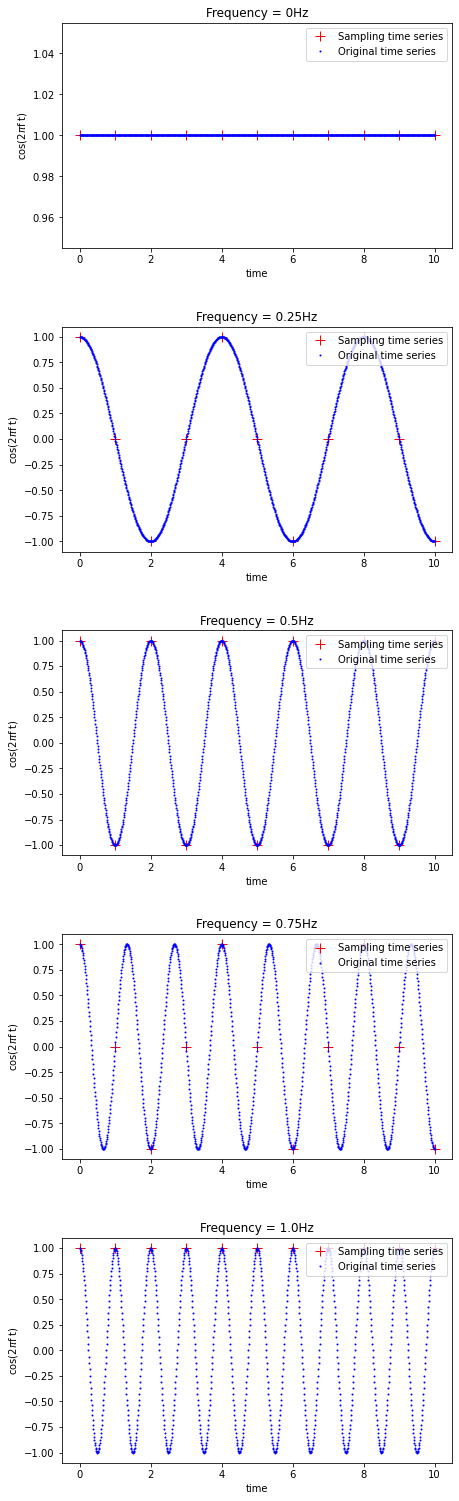

In [14]:
frequencies = [0, 0.25, 0.5, 0.75, 1.0]
# sampling interval dt = 1
t = np.linspace(0,10,11)
# very small sampling interval
smallt = np.linspace(0,10,1001)
i = 1
plt.figure(figsize=(7,25))
for f in frequencies:
    # g(t) with very small sampling inteval
    gt = np.cos(2*np.pi*f*smallt)
    # approximation value of g(t)
    g_t = np.cos(2*np.pi*f*t)
    plt.subplot(5,1,i)
    plt.plot(t, g_t,"+r", markersize = 10, label = 'Sampling time series')
    plt.plot(smallt, gt, "ob", markersize = 1, label = 'Original time series')
    plt.title("Frequency = "+str(f)+"Hz")
    plt.xlabel("time")
    plt.ylabel("cos(2$\pi$f t)") 
    plt.legend(loc='upper right')   
    plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
    i += 1
plt.show()


For frequency values of $f$ = 0, 0.25 , 0.5 Hz, the sampling time series are a fair representation of the original time series $g(t)$.  
For frequency of 0.00 Hz, the sampling time series is just a straight line which is same as the original time series $g(t)$.  
For frequency of 0.25 Hz, the sampling time series has points on the positive peaks, negative peaks and zeros which is on the same plot of the original time series $g(t)$.  
For frequency of 0.50 Hz, the sampling time series has points on the positive peaks and negative peaks which is on the same plot of the original time series $g(t)$.  
For frequency of 0.75 Hz, the sampling time series is not a fair representation of the original time series $g(t)$. The sampling time series does not show every positive and negative peaks of the original time series $g(t)$ which makes it look like the sampling time series plot of 0.25 Hz.   
For frequency of 1.00 Hz, the sampling time series is not a fair representation of the original time series $g(t)$. The sampling time series is just a straight line unlike the original time series $g(t)$.  


Apparent frequency of 0.00 Hz sampling time series is zero since it is a flat time series.  
Apparent frequency of 0.25 Hz sampling time series is 0.25 Hz with N = 4.  
Apparent frequency of 0.50 Hz sampling time series is 0.50 Hz with N = 2.  
Apparent frequency of 0.75 Hz sampling time series is 0.25 Hz with N = 4.  
Apparent frequency of 1.00 Hz sampling time series is zero since it is a flat time series.  


With a sampling interval of $dt$ = 1, the maximum frequency $f$ of $g(t)$ such that it can be fairly represented by the discrete time series is 0.50 Hz. It is because the apparent frequencies of 0, 0.25 and 0.50 Hz sampling time series are same as the actual frequencies while the apparent freqeuncies of 0.75 and 1.00 Hz sampling time series are not same as the actual frequencies.
